<a href="https://colab.research.google.com/github/mmanam2/mmanam2/blob/main/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
# Import the pandas library
import pandas as pd
# Load the dataset
all_hospitals = pd.read_csv('https://hds5210-data.s3.amazonaws.com/complications_all.csv')

# Show the number of rows and columns
rows, columns = all_hospitals.shape
print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 91395 rows and 18 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [2]:
# Count unique values per column
unique_counts = all_hospitals.nunique()

# Identify the column with the most unique values
most_diverse_column = unique_counts.idxmax()
most_diverse_count = unique_counts.max()

print("Unique values per column:")
print(unique_counts)
print(f"The column with the most unique values is '{most_diverse_column}' with {most_diverse_count} unique values.")

# If the most diverse column is an identifier, find the next highest
if 'id' in most_diverse_column.lower():  # Adjust based on dataset specifics
    next_diverse_column = unique_counts.drop(most_diverse_column).idxmax()
    next_diverse_count = unique_counts[next_diverse_column]
    print(f"The next most diverse column is '{next_diverse_column}' with {next_diverse_count} unique values.")


Unique values per column:
Facility ID             4904
Facility Name           4740
Address                 4877
City                    2969
State                     56
ZIP Code                4469
County Name             1562
Phone Number            4889
Measure ID                19
Measure Name              19
Compared to National       8
Denominator             7551
Score                   3060
Lower Estimate          2540
Higher Estimate         3593
Footnote                   6
Start Date                 3
End Date                   2
dtype: int64
The column with the most unique values is 'Denominator' with 7551 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
# Find redundant columns
redundant_columns = [col for col in all_hospitals.columns if all_hospitals[col].nunique() == 1]

if redundant_columns:
    print("Columns with the same value for every row:", redundant_columns)
else:
    print("No columns have the same value for every row.")


No columns have the same value for every row.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

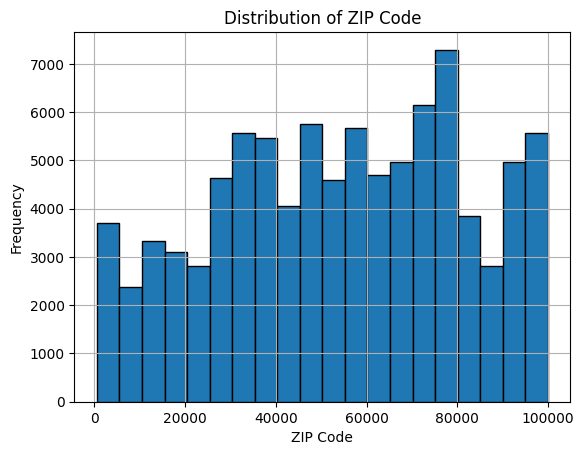

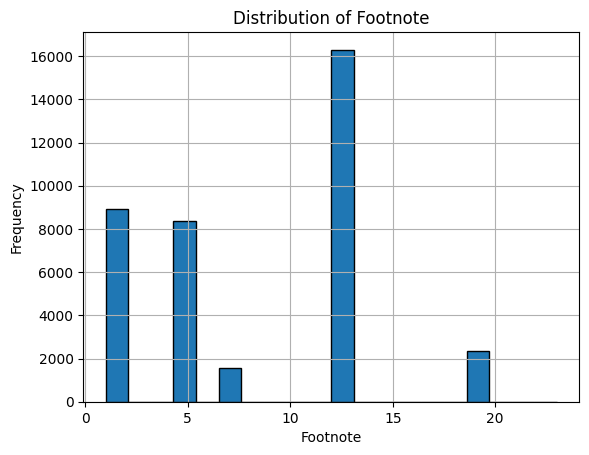

In [4]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = all_hospitals.select_dtypes(include=['number'])

# Create histograms for each numeric column
for column in numeric_columns.columns:
    plt.figure()
    all_hospitals[column].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

Correlation matrix of numeric columns:
          ZIP Code  Footnote
ZIP Code  1.000000  0.005201
Footnote  0.005201  1.000000


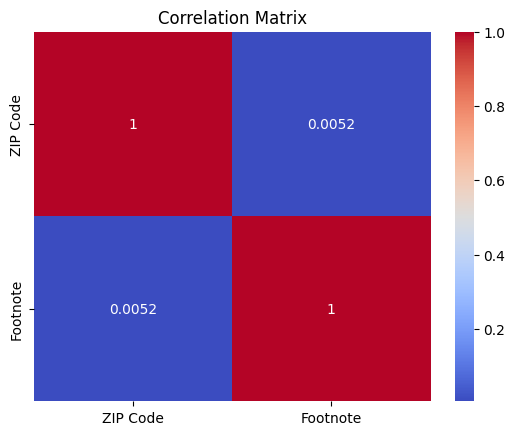

In [5]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()

print("Correlation matrix of numeric columns:")
print(correlation_matrix)

# Plot heatmap if you'd like to visualize correlations (requires seaborn)
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




---



## Submitting Your Work

Submit your work as usual.